In [95]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt



In [96]:
df = pd.read_csv('DrugData.csv')
df= df.dropna(subset = ['Sold As'])
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('MDMA / Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Molly / Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Molly','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('Ecstasy','MDMA'))
df['Sold As'] = df['Sold As'].apply(lambda x: x.replace('MDMA / MDMA','MDMA'))
df['Year']=df['Date Published'].apply(lambda x: x[-4:])

In [97]:
df['Year'] = df['Year'].astype(int)

In [98]:
df['Year']

1       2020
2       2020
3       2020
4       2020
5       2020
        ... 
4895    2014
4938    2014
5543    2013
5851    2012
6311    2010
Name: Year, Length: 4532, dtype: int64

In [99]:
df['Sold As'].value_counts()

MDMA                                    2557
Not Specified                            193
LSD                                      188
Cocaine                                   90
Alprazolam                                86
                                        ... 
Watson 853 (Hydrocodone/APAP 10-325)       1
MDMA crystals                              1
2C-B-FLY                                   1
Alpha-PHP                                  1
MDMA with acid                             1
Name: Sold As, Length: 535, dtype: int64

In [100]:
df_MDMA = df.loc[df['Sold As']=='MDMA']
df_LSD = df.loc[df['Sold As']=='LSD']
df_Cocaine = df.loc[df['Sold As']=='Cocaine']

In [101]:
df_MDMA.shape

(2557, 9)

In [102]:
df_MDMA['Match'] = np.where(df_MDMA['Sold As']==df_MDMA['Substance'], 'Yes', 'No')
df['Match'] = np.where(df['Sold As']==df['Substance'], 'Yes', 'No')
df_LSD['Match'] = np.where(df_LSD['Sold As']==df_LSD['Substance'], 'Yes', 'No')
df_Cocaine['Match'] = np.where(df_Cocaine['Sold As']==df_Cocaine['Substance'], 'Yes', 'No')

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is try

In [103]:
df_MDMA['Match'].groupby(df_MDMA['Year']).value_counts()

Year  Match
2014  No        13
      Yes       10
2015  Yes      146
      No        90
2016  Yes      226
      No        80
2017  Yes      422
      No        80
2018  Yes      601
      No        92
2019  Yes      603
      No        65
2020  Yes      122
      No         7
Name: Match, dtype: int64

In [104]:
df_LSD['Match'].groupby(df_LSD['Year']).value_counts()

Year  Match
2015  Yes      15
      No        5
2016  Yes      24
      No        9
2017  Yes      16
      No        8
2018  Yes      30
      No        7
2019  Yes      53
      No       12
2020  No        6
      Yes       3
Name: Match, dtype: int64

In [105]:
df_Cocaine['Match'].groupby(df_Cocaine['Year']).value_counts()

Year  Match
2010  Yes       1
2012  Yes       1
2015  Yes      13
2016  Yes      11
      No        1
2017  Yes      12
2018  Yes      25
      No        3
2019  Yes      14
      No        2
2020  Yes       7
Name: Match, dtype: int64

In [106]:
data = df['Match'].groupby(df['Year']).value_counts().unstack()
data_MDMA = df_MDMA['Match'].groupby(df_MDMA['Year']).value_counts().unstack()
data_LSD = df_LSD['Match'].groupby(df_LSD['Year']).value_counts().unstack()
data_Cocaine = df_Cocaine['Match'].groupby(df_Cocaine['Year']).value_counts().unstack()

In [107]:
data_MDMA['Percent']=data_MDMA['Yes']/(data_MDMA['Yes']+data_MDMA['No'])
data_LSD['Percent']=data_LSD['Yes']/(data_LSD['Yes']+data_LSD['No'])
data_Cocaine['Percent']=data_Cocaine['Yes']/(data_Cocaine['Yes']+data_Cocaine['No'])
data['Percent']=data['Yes']/(data['Yes']+data['No'])

In [108]:
data = data.dropna(subset = ['Percent'])
data_MDMA = data_MDMA.dropna(subset = ['Percent'])
data_LSD = data_LSD.dropna(subset = ['Percent'])
data_Cocaine = data_Cocaine.dropna(subset = ['Percent'])




In [124]:
data['Substance'] = 'Total'

In [110]:
data_MDMA['Substance']= "MDMA"
data_MDMA

Match,No,Yes,Percent,Substance
Year,,,,
2014,13,10,0.434783,MDMA
2015,90,146,0.618644,MDMA
2016,80,226,0.738562,MDMA
2017,80,422,0.840637,MDMA
2018,92,601,0.867244,MDMA
2019,65,603,0.902695,MDMA
2020,7,122,0.945736,MDMA


In [111]:
data_LSD['Substance'] = 'LSD'
data_LSD

Match,No,Yes,Percent,Substance
Year,,,,
2015,5,15,0.750000,LSD
2016,9,24,0.727273,LSD
2017,8,16,0.666667,LSD
2018,7,30,0.810811,LSD
2019,12,53,0.815385,LSD
2020,6,3,0.333333,LSD


In [112]:
data_Cocaine['Substance'] = 'Cocaine'
data_Cocaine

Match,No,Yes,Percent,Substance
Year,,,,
2016,1.0,11.0,0.916667,Cocaine
2018,3.0,25.0,0.892857,Cocaine
2019,2.0,14.0,0.875000,Cocaine


In [125]:
stacked = pd.concat([data,data_MDMA,data_LSD,data_Cocaine],axis = 0)

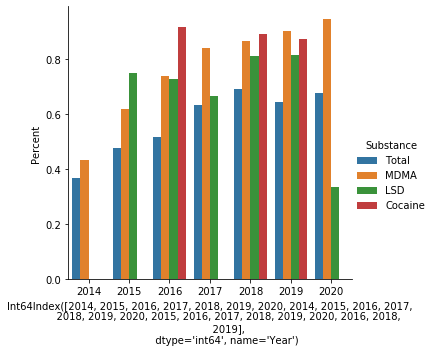

In [126]:
sns.catplot(x = stacked.index , y = 'Percent', hue = 'Substance',data = stacked, kind = 'bar')